In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats
import math

In [2]:
df = pd.read_csv("C:/Users/user/Documents/Datasets/Titanic/train.csv")
data = pd.read_csv("C:/Users/user/Documents/Datasets/Titanic/train.csv")

df.head(-7)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# CHeck for NANs across all columns
for col in df.columns:
    count_nans = len(df.loc[df[col].isnull()])
    print("NANs in ",col," : ",count_nans)    

NANs in  PassengerId  :  0
NANs in  Survived  :  0
NANs in  Pclass  :  0
NANs in  Name  :  0
NANs in  Sex  :  0
NANs in  Age  :  177
NANs in  SibSp  :  0
NANs in  Parch  :  0
NANs in  Ticket  :  0
NANs in  Fare  :  0
NANs in  Cabin  :  687
NANs in  Embarked  :  2


In [5]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# Handle Nans in Embarked
df['Embarked'].fillna('S',inplace=True)

In [7]:
df_age_nan = df.loc[df['Age'].isnull()]
df_age_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
df['Age'].fillna(-1,inplace=True)


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

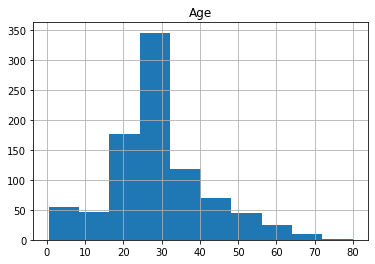

In [9]:
# Replacing age with median value + 0.5
df['Age'] = df['Age'].replace([-1,0],28.5)
df.hist(column='Age')

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

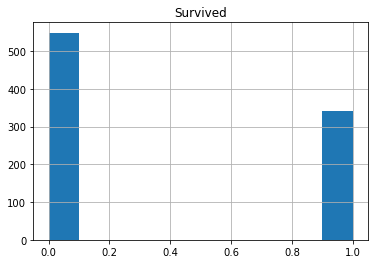

In [10]:
# Exploratory
df.hist(column='Survived')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

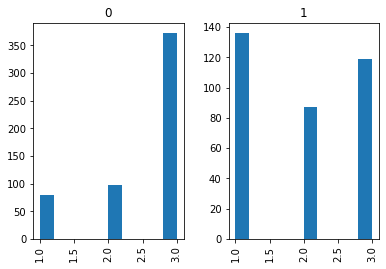

In [11]:
df.hist(column='Pclass',by='Survived')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

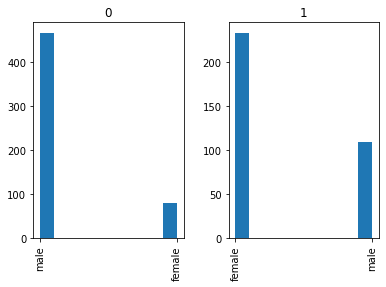

In [12]:
df.hist(column='Sex',by='Survived')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

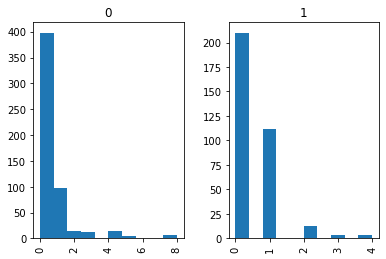

In [13]:
df.hist(column='SibSp',by='Survived')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

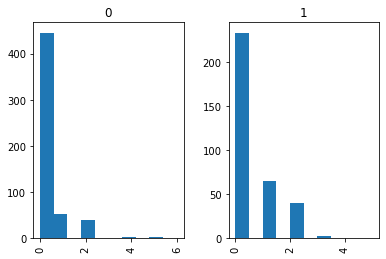

In [14]:
df.hist(column='Parch',by='Survived')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

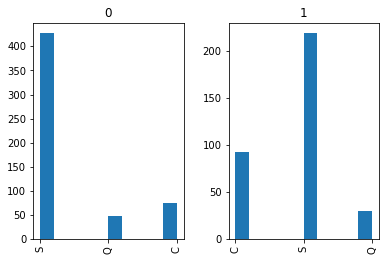

In [15]:
df.hist(column='Embarked',by='Survived')

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

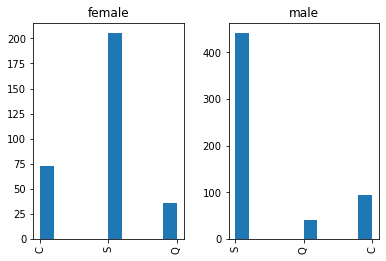

In [16]:
df.hist(column='Embarked',by='Sex')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

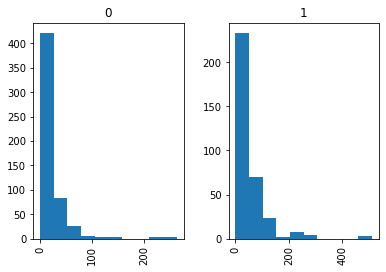

In [17]:
df.hist(column='Fare',by='Survived')

In [18]:
df.loc[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.5,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.5,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,28.5,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.5,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.5,0,0,112052,0.0,NaN,S


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head(-340)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",0,19.0,1,0,2908,26.0000,NaN,2
547,548,1,2,"Padro y Manent, Mr. Julian",1,28.5,0,0,SC/PARIS 2146,13.8625,NaN,0
548,549,0,3,"Goldsmith, Mr. Frank John",1,33.0,1,1,363291,20.5250,NaN,2
549,550,1,2,"Davies, Master. John Morgan Jr",1,8.0,1,1,C.A. 33112,36.7500,NaN,2


In [20]:
pclass_df = pd.get_dummies(df.Pclass,prefix='Pclass')
embarked_df = pd.get_dummies(df.Embarked, prefix = 'Embarked')
df = pd.concat([df, embarked_df, pclass_df], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.5,1,2,W./C. 6607,23.4500,NaN,2,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,1,0,0,1,0,0


In [21]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df.Age.values.reshape(-1,1))
df['Fare'] = scaler.fit_transform(df.Fare.values.reshape(-1,1))


In [22]:
df.loc[(df['SibSp']>0)&(df['Parch']>0),['SibSp','Parch']]

,SibSp,Parch
7,3,1
10,1,1
13,1,5
16,4,1
24,3,1
...,...,...
856,1,1
863,8,2
869,1,1
871,1,1


In [23]:
ticket = df['Ticket'].value_counts()
ticket[ticket>3]

347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
113781          4
17421           4
349909          4
LINE            4
19950           4
113760          4
347077          4
PC 17757        4
4133            4
W./C. 6608      4
2666            4
Name: Ticket, dtype: int64

In [24]:
# MODELLING
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
def get_accuracy(model, input_cols, test_size):
    X = df[input_cols]
    Y = df['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_pred, y_test)*100
    recall = metrics.recall_score(y_pred, y_test)*100
    precision = metrics.precision_score(y_pred, y_test)*100
    print("[Accuracy, Precision, Recall]")
    return [acc, precision, recall]




In [26]:
cat_cols = list(df.columns[12:18])
cat_cols.extend(['Sex'])
numeric_cols = ['Fare','Age','SibSp','Parch']
all_cols = list()
all_cols.extend(cat_cols)
all_cols.extend(numeric_cols)
all_cols

feature_sets = {'numeric':numeric_cols,
                'categorical':cat_cols,
                'all_cols':all_cols
               }
       
feature_sets['all_cols']

['Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex',
 'Fare',
 'Age',
 'SibSp',
 'Parch']

In [27]:
# Decision Tree
dt = DecisionTreeClassifier(min_impurity_decrease=0.002)
get_accuracy(dt, feature_sets['all_cols'], 0.8)
dt.get_params()

[Accuracy, Precision, Recall]


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.002,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [30]:
import graphviz
from sklearn import tree
import math

In [31]:
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data, format="png") 
graph.render()

'Source.gv.png'

In [33]:
# Gaussian Naive Bayes
gnb = GaussianNB() 
get_accuracy(gnb, feature_sets['all_cols'], 0.78)


[Accuracy, Precision, Recall]


[78.70503597122303, 68.97810218978103, 75.0]

In [34]:
def plot_normal_curve(params):
    for mu,sigma in params:
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 10)
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.show()

Mean values are 
 [[0.109375   0.0859375  0.8046875  0.1484375  0.2109375  0.640625
  0.8671875  0.04588788 0.37263406 0.53125    0.2421875 ]
 [0.22058824 0.08823529 0.69117647 0.39705882 0.23529412 0.36764706
  0.27941176 0.09691178 0.3521133  0.5        0.47058824]]

 Sigma values are 
 [[0.09741211 0.07855225 0.15716553 0.12640381 0.16644287 0.23022461
  0.11517334 0.00526766 0.02876134 1.67089844 0.33978272]
 [0.17192907 0.08044983 0.21345156 0.23940312 0.1799308  0.2324827
  0.20134083 0.01565733 0.01781934 0.51470588 0.51384083]]


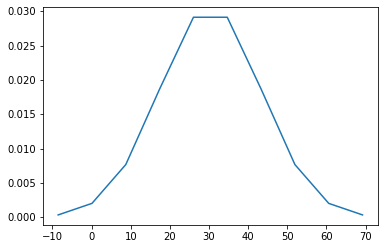

In [35]:
print("Mean values are \n", gnb.theta_)
print("\n Sigma values are \n",gnb.sigma_)
plot_normal_curve([[30.33333333,math.sqrt(167.95726513)]])


In [36]:
mnb = MultinomialNB()
get_accuracy(mnb, feature_sets['categorical'], 0.75)


[Accuracy, Precision, Recall]


[76.5321375186846, 51.11111111111111, 84.66257668711657]

In [37]:
bnb = BernoulliNB()
get_accuracy(bnb, feature_sets['categorical'], 0.75)


[Accuracy, Precision, Recall]


[75.33632286995515, 64.37246963562752, 67.37288135593221]

In [38]:
cnb = CategoricalNB()
get_accuracy(cnb, feature_sets['categorical'], 0.75)

[Accuracy, Precision, Recall]


[79.82062780269058, 62.2568093385214, 80.8080808080808]

In [39]:
# Logistic Regression
lr = LogisticRegression()
get_accuracy(lr, feature_sets['all_cols'], 0.75)


[Accuracy, Precision, Recall]


[78.02690582959642, 70.16129032258065, 70.44534412955466]

In [40]:
# Random Forest
rf = RandomForestClassifier()
get_accuracy(rf, feature_sets['all_cols'], 0.75)


[Accuracy, Precision, Recall]


[76.5321375186846, 66.015625, 70.7112970711297]

In [42]:
model = KNeighborsClassifier()
get_accuracy(model, feature_sets['all_cols'], 0.8)

[Accuracy, Precision, Recall]


[79.38288920056101, 61.78571428571429, 81.2206572769953]